<h1> Analítica de Datos | PAR </h1>
<h2> <strong>Actividad 7:</strong> Uso de la libreria Scikit-Learn para analizar un conjunto de datos</h2>

<p>
    <strong>Nombre del alumno:</strong> Pedro Aguilar Rodriguez
    <br>
    <strong>Código del alumno:</strong> 218713675
    <br>
    <strong>Repositorio GitHub: </strong><a href='https://github.com/pedro1001031001/AD-2025-B/tree/master'>https://github.com/pedro1001031001/AD-2025-B/tree/master</a>.
    <br>
    <strong>Fecha:</strong> 06 de septiembre de 2025
    <br>
    <strong>Objetivo(s):</strong>
    <br>
    <ol>
        <li> Explicación del análisis del conjunto de datos histórico.</li>
        <li> Realización de la predicción, a través de la regresión, para identificar los primeros 20 países.</li>
        <li> Graficación de los resultados.</li><br>
    </ol>
</p>

<h3> Metodología para el aprendizaje supervisado </h3>

<p>
    De acuerdo con la metodología propuesta, a continuación se implementará, a rasgos muy generales, los siguientes pasos:
    <ol>
        <li> Recopilación de datos a utilizar en el modelo.</li>
        <li> División del conjunto de datos en un conjunto de entrenamiento y uno de prueba.</li>
        <li> Selección del algoritmo; en este caso, se sugiere que se empleé la regresión como método a propiado.</li> 
        <li> Entrenamiento del modelo, utilizanndo un conjunto de dato de entrenamiento.</li>
        <li> Validación y prueba del modelo, utilizando el conjunto de datos de prueba.</li>
        <ol>
            <li> Verificación del rendimiento del modelo.</li>
            <li> Ajustamiento los parámetros, según sea necesario. </li>
    </ol>
</p>

R^2 del modelo: 0.9445820482581349
     NOC  Predicted_Medals
220  USA      15803.128543
76   GBR      12150.534147
71   FRA      10884.036772
81   GER      10020.005781
13   AUS       9262.650019
218  URS       8297.846451
102  ITA       7558.224621
197  SWE       6311.405366
148  NED       5905.730885
106  JPN       5828.023832
37   CAN       5622.750720
42   CHN       5493.362999
92   HUN       5323.251992
175  RUS       4658.193043
65   ESP       4393.948308
173  ROU       4194.569884
165  POL       4186.660974
30   BRA       3953.785625
56   DEN       3906.614870
78   GDR       3589.792388


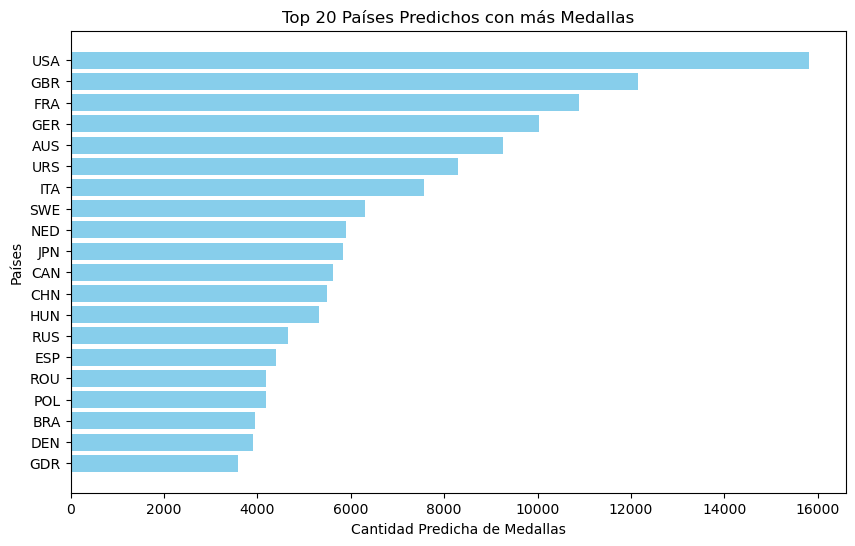

In [88]:
# librerias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 1. Cargar datos
file_path = "./olympics_dataset.csv"
data = pd.read_csv(file_path, header=0)

# 2. Transformar las medallas en valores numéricos
medal_mapping = {'Gold': 3, 'Silver': 2, 'Bronze': 1}
data['Binary_Medal'] = data['Medal'].map(medal_mapping).fillna(0).astype(int)

# 3. Agrupar los datos por país (NOC) y contar las medallas por tipo
medals_by_country = data.groupby('NOC').agg({'Binary_Medal': 'count'}).reset_index()

# 4. Dividir las medallas en categorías separadas para cada tipo (Oro, Plata, Bronce)
gold_medals = data[data['Medal'] == 'Gold'].groupby('NOC').size().reset_index(name='Gold')
silver_medals = data[data['Medal'] == 'Silver'].groupby('NOC').size().reset_index(name='Silver')
bronze_medals = data[data['Medal'] == 'Bronze'].groupby('NOC').size().reset_index(name='Bronze')

# 5. Combinar los datos de medallas por tipo en un solo DataFrame
medals_by_country = pd.merge(medals_by_country, gold_medals, on='NOC', how='left')
medals_by_country = pd.merge(medals_by_country, silver_medals, on='NOC', how='left')
medals_by_country = pd.merge(medals_by_country, bronze_medals, on='NOC', how='left')

# Rellenar los valores NaN con 0
medals_by_country = medals_by_country.fillna(0)

# 6. Definir las características (X) y la variable objetivo (y)
# Las características X serán las medallas de cada tipo y la variable objetivo y será la cantidad total de medallas
X = medals_by_country[['Gold', 'Silver', 'Bronze']]  # Características
y = medals_by_country['Binary_Medal']  # Medallas totales

# 7. División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 8. Estandarización de las características
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 9. Entrenamiento del modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# 10. Realizar la predicción
y_pred = lr.predict(X_test_scaled)

# 11. Evaluación del modelo 
print(f"R^2 del modelo: {lr.score(X_test_scaled, y_test)}")

# 12. Predecir las medallas para todos los países
predictions = lr.predict(scaler.transform(medals_by_country[['Gold', 'Silver', 'Bronze']]))

# 13. Añadir las predicciones al DataFrame de medallas por país
medals_by_country['Predicted_Medals'] = predictions

# 14. Ordenar los países por la predicción de medallas (de mayor a menor)
top_20_countries = medals_by_country.sort_values(by='Predicted_Medals', ascending=False).head(20)

# 15. Mostrar los primeros 20 países
print(top_20_countries[['NOC', 'Predicted_Medals']])

# 16. Graficar los resultados
plt.figure(figsize=(10, 6))
plt.barh(top_20_countries['NOC'], top_20_countries['Predicted_Medals'], color='skyblue')
plt.xlabel('Cantidad Predicha de Medallas')
plt.ylabel('Países')
plt.title('Top 20 Países Predichos con más Medallas')
plt.gca().invert_yaxis()  # Invertir el eje Y para que el primer país aparezca arriba
plt.show()